In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean_students_performance.csv")

In [2]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

In [3]:
df["average score"] = df["total score"] / 3

In [4]:
def categorize(score):
    if score >= 70:
        return "A"
    elif score >= 60:
        return "B"
    elif score >= 50:
        return "C"
    elif score >= 45:
        return "D"
    elif score >= 40:
        return "E"
    else:
        return "F"

df["grade"] = df["average score"].apply(categorize)

In [6]:
def classify(grad):
    if grad >= 70:
        return "excellent"
    elif grad >= 60:
        return "v. good"
    elif grad >= 50:
        return "good"
    elif grad >= 45:
        return "fair"
    elif grad >= 40:
        return "pass"
    else:
        return "weak"

df["performance level"] = df["average score"].apply(classify)

In [7]:
df["best subject"] = df[["math score", "reading score", "writing score"]].idxmax(axis=1)

In [8]:
df["best subject"] = df["best subject"].str.replace("math score", "math")

In [9]:
df["best subject"] = df["best subject"].str.replace("reading score", "reading")

In [10]:
df["best subject"] = df["best subject"].str.replace("writing score", "writing")

In [11]:
df["gender encoded"] = df["gender"].map({"female": 0, "male": 1})

In [12]:
df["lunch quality encoded"] = df ["lunch quality"].astype("category").cat.codes

In [13]:
df.head()

,gender,race,parental level of education,lunch quality,test preparation course,math score,reading score,writing score,total score,average score,grade,performance level,best subject,gender encoded,lunch quality encoded
0,female,Americans,bachelor's degree,high,none,72,72,74,218,72.666667,A,excellent,writing,0,0
1,female,Europeans,some college,high,completed,69,90,88,247,82.333333,A,excellent,reading,0,0
2,female,Americans,master's degree,high,none,90,95,93,278,92.666667,A,excellent,reading,0,0
3,male,Asians,associate's degree,poor,none,47,57,44,148,49.333333,D,fair,reading,1,1
4,male,Europeans,some college,high,none,76,78,75,229,76.333333,A,excellent,reading,1,0


In [14]:
df.tail()

,gender,race,parental level of education,lunch quality,test preparation course,math score,reading score,writing score,total score,average score,grade,performance level,best subject,gender encoded,lunch quality encoded
995,female,Arabians,master's degree,high,completed,88,99,95,282,94.000000,A,excellent,reading,0,0
996,male,Europeans,high school,poor,none,62,55,55,172,57.333333,C,good,math,1,1
997,female,Europeans,high school,poor,completed,59,71,65,195,65.000000,B,v. good,reading,0,1
998,female,Africans,some college,high,completed,68,78,77,223,74.333333,A,excellent,reading,0,0
999,female,Africans,some college,poor,none,77,86,86,249,83.000000,A,excellent,reading,0,1


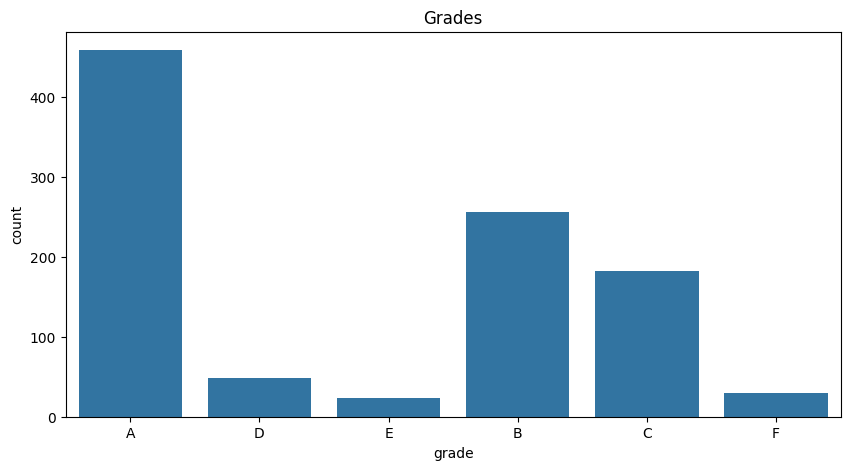

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='grade')
plt.title('Grades')
plt.show()

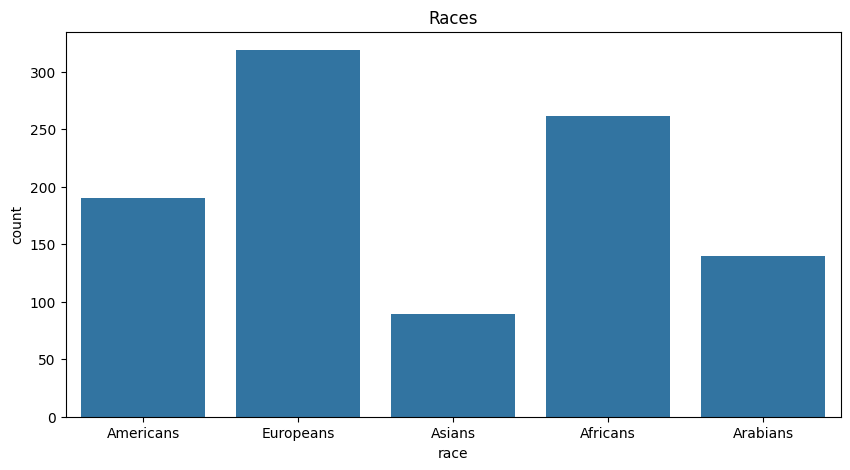

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='race')
plt.title('Races')
plt.show()

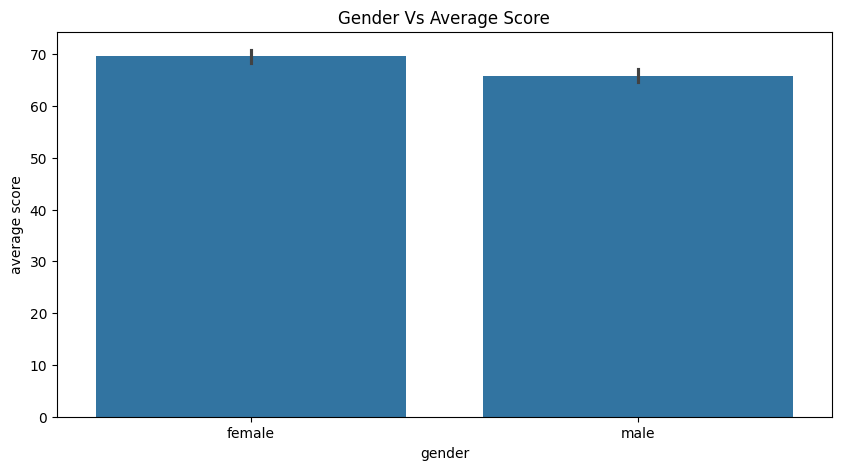

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y="average score", data=df)
plt.title("Gender Vs Average Score")
plt.show()

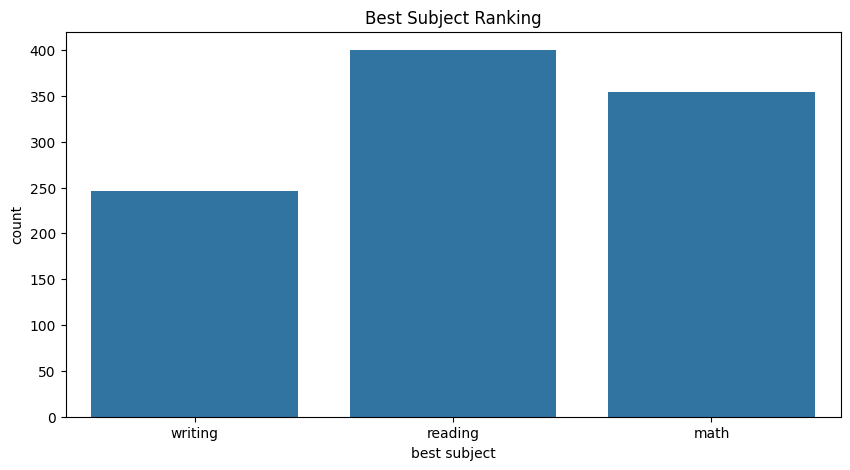

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="best subject", data=df)
plt.title("Best Subject Ranking")
plt.show()

In [18]:
df.to_csv("../data/engineered dataset.csv", index=False)

# Day 4 - Feature Engineering Summary

### What i created today:
- Total Score Column
- Average Score Column
- Grade Column
- Performance Level Column
- Best Subject Column
- Encoded Categories for future Modelling

### Why did I do all these
These engineered features will make it easier to understand student performance patterns and perpare the data for further analysis and machine learning.